In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from itertools import product
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib

path = 'data/CoVid19-Japan-weekly_patients_by_age.csv'
df = pd.read_csv(path, header=[0,1], index_col=0, parse_dates=[0])
df = df.sort_index(ascending=True)
# 厚労省CSVを読込む
# 新規感染者
nc_day = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
nc_day["Date"] = pd.to_datetime(nc_day["Date"])
nc_day = nc_day.set_index("Date")
# 新規累積死亡者
nd_day = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv")
nd_day["Date"] = pd.to_datetime(nd_day["Date"])
nd_day = nd_day.set_index("Date").diff().dropna()

In [12]:
nc_day

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-20,39576,1519,415,205,489,173,129,361,1282,433,...,216,113,1762,94,201,250,208,161,321,677
2022-03-21,27587,1009,394,131,277,135,81,219,1410,248,...,117,84,1191,86,128,244,169,120,218,300
2022-03-22,20168,885,163,109,251,108,69,229,776,312,...,79,90,770,221,121,239,173,88,219,326


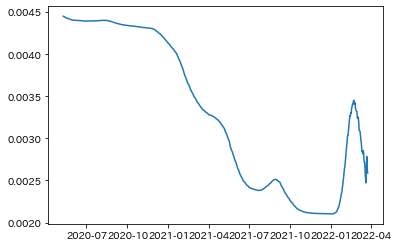

In [11]:
nc = nc_day[::-1].dropna().astype(int).cumsum()[::-1]
nd = nd_day[::-1].dropna().astype(int).cumsum()[::-1]
plt.plot( (nd/nc)["ALL"] )

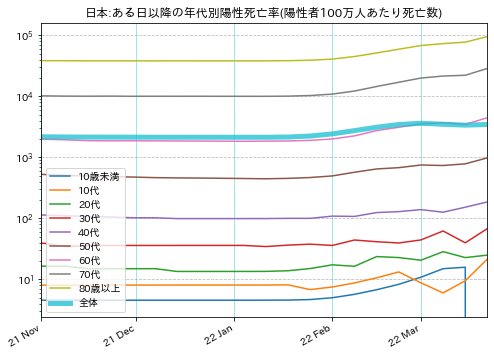

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
nc = df.xs('陽性者数', level=0, axis=1).diff()[::-1].dropna().astype(int).cumsum()[::-1]
nd = df.xs('死亡者数', level=0, axis=1).diff()[::-1].dropna().astype(int).cumsum()[::-1]
(nd/nc*1e6).loc[:,:"80歳以上"].plot(ax=ax)
(nd/nc*1e6)["合計"].plot(ax=ax, lw=5, alpha=0.75, label="全体")
ax.set_yscale('log')
ax.legend(loc='lower left')
ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
ax.grid(which='major', axis='y', linestyle='--', color='tab:gray', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
ax.set_xlim(dt.date(2021,11,1), nd.index[-1])
ax.set_title("日本:ある日以降の年代別陽性死亡率(陽性者100万人あたり死亡数)")
fig.savefig("fig/CoVid19-Japan-CFR_by_age.png", bbox_inches='tight')
plt.show()

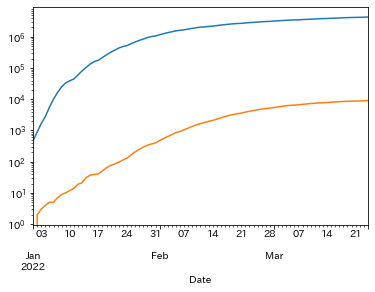

In [3]:
ref_date = dt.datetime.today()-dt.timedelta(weeks=12)
ref_cum_case = nc_day["ALL"].loc[ref_date:].cumsum()
ref_cum_dead = nd_day["ALL"].loc[ref_date:].cumsum()
ref_cum_case.plot()
ref_cum_dead.plot()
plt.yscale('log')

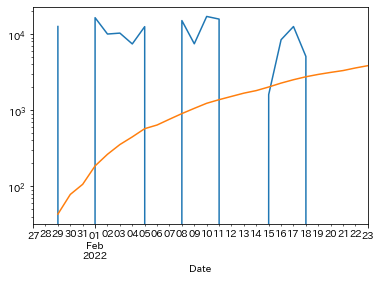

In [144]:
nc_day.loc[ref_date:,"ALL"].diff().cumsum().plot()
nd_day.loc[ref_date:,"ALL"].diff().cumsum().plot()
plt.xlim([ref_date, nc_day.index[-1]])
plt.yscale('log')

In [128]:
nd_day.loc[ref_date-dt.timedelta(days=1):,"ALL"].diff().dropna().cumsum()

Date
2022-01-28      44.0
2022-01-29      87.0
2022-01-30     122.0
2022-01-31     150.0
2022-02-01     229.0
2022-02-02     307.0
2022-02-03     397.0
2022-02-04     489.0
2022-02-05     615.0
2022-02-06     682.0
2022-02-07     804.0
2022-02-08     945.0
2022-02-09    1100.0
2022-02-10    1275.0
2022-02-11    1417.0
2022-02-12    1560.0
2022-02-13    1717.0
2022-02-14    1852.0
2022-02-15    2059.0
2022-02-16    2312.0
2022-02-17    2556.0
2022-02-18    2791.0
2022-02-19    2994.0
2022-02-20    3179.0
2022-02-21    3358.0
2022-02-22    3630.0
2022-02-23    3887.0
Name: ALL, dtype: float64

Text(0.5, 1.0, '当該日以降の陽性数100万人あたり累積死亡数')

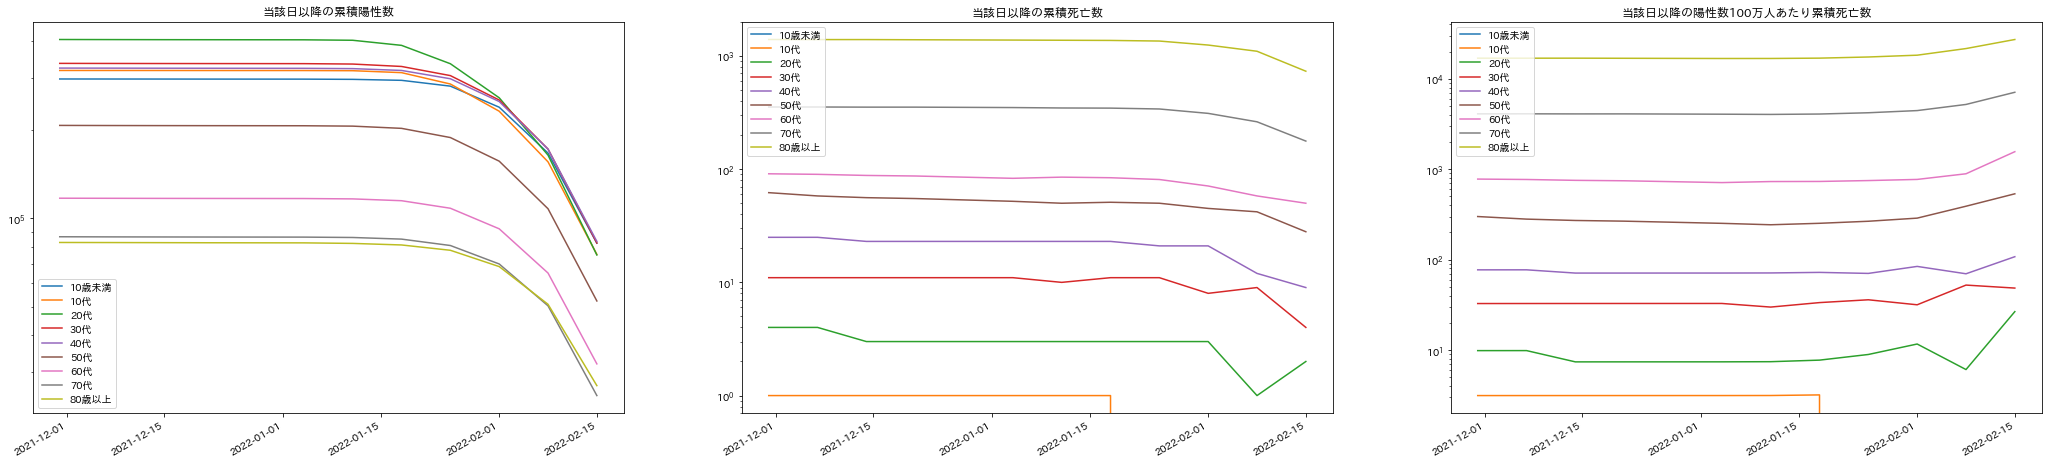

In [42]:
start_date = "2021-11-30"
fig, ax = plt.subplots(1,3,figsize=(12*3,8))
nc.loc[start_date:,:"80歳以上"].plot(ax=ax[0])
nd.loc[start_date:,:"80歳以上"].plot(ax=ax[1])
(nd.loc[start_date:,:"80歳以上"]/nc.loc[start_date:,:"80歳以上"]*1e6).plot(ax=ax[2])
ax[0].set_yscale('log')
ax[0].set_title("当該日以降の累積陽性数")
ax[1].set_yscale('log')
ax[1].set_title("当該日以降の累積死亡数")
ax[1].legend(loc='upper left')
ax[2].set_yscale('log')
ax[2].legend(loc='upper left')
ax[2].set_title("当該日以降の陽性数100万人あたり累積死亡数")


In [72]:
nd.loc["2021-11-30":]/nc.loc[start_date:]

,10歳未満,10代,20代,30代,40代,50代,60代,70代,80歳以上,不明等,合計
2021-11-30,0.0,0.000003,0.000010,0.000033,0.000077,0.000300,0.000779,0.004096,0.016902,0.019407,0.000953
2021-12-07,0.0,0.000003,0.000010,0.000033,0.000077,0.000281,0.000771,0.004100,0.016888,0.018549,0.000949
2021-12-14,0.0,0.000003,0.000007,0.000033,0.000071,0.000272,0.000754,0.004091,0.016902,0.018624,0.000946
2021-12-21,0.0,0.000003,0.000007,0.000033,0.000071,0.000267,0.000746,0.004093,0.016855,0.018502,0.000943
2022-01-04,0.0,0.000003,0.000007,0.000033,0.000071,0.000252,0.000712,0.004061,0.016760,0.020528,0.000941
2022-01-11,0.0,0.000003,0.000007,0.000030,0.000071,0.000243,0.000731,0.004038,0.016770,0.019273,0.000935
2022-01-18,0.0,0.000003,0.000008,0.000034,0.000072,0.000253,0.000733,0.004078,0.016914,0.019108,0.000948
2022-01-25,0.0,0.000000,0.000009,0.000036,0.000071,0.000266,0.000750,0.004213,0.017414,-2.276405,0.001010
2022-02-01,0.0,0.000000,0.000012,0.000032,0.000084,0.000288,0.000772,0.004452,0.018235,0.041108,0.001170
2022-02-08,0.0,0.000000,0.000006,0.000052,0.000070,0.000390,0.000891,0.005204,0.021585,0.047104,0.001465


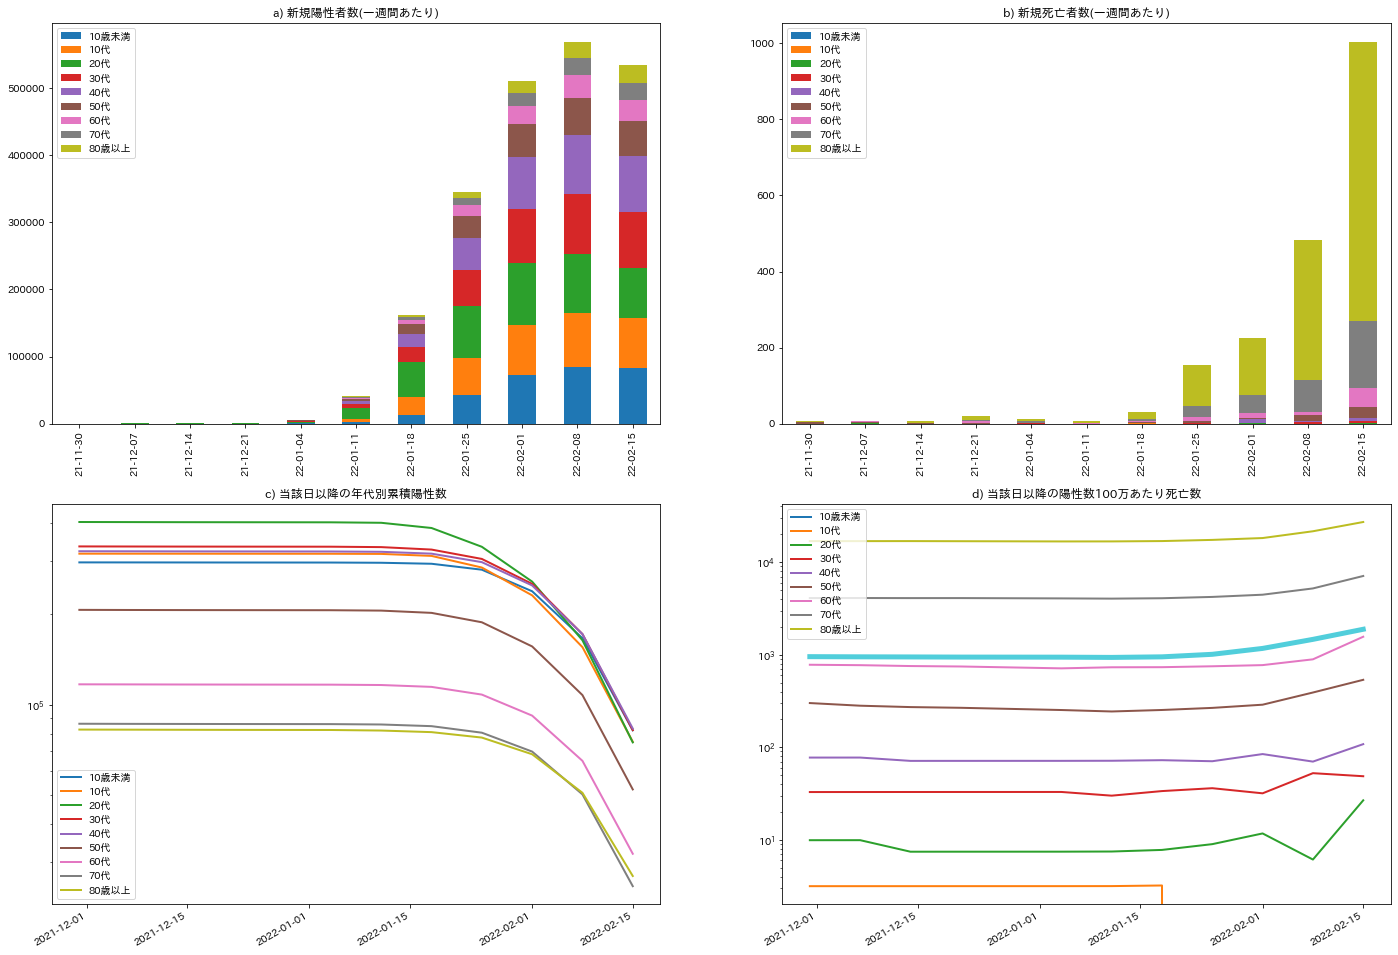

In [92]:
fig, ax = plt.subplots(2,2,figsize=(12*2,9*2))
ax0, ax1, ax2, ax3 = ax.reshape(1,4)[0]
# 1行目
df["陽性者数"].loc[start_date:,:"80歳以上"].diff().plot(kind='bar', stacked="True",ax=ax0)
ax0.set_xticklabels(df.loc[start_date:].index.strftime("%y-%m-%d").to_list())
ax0.set_title("a) 新規陽性者数(一週間あたり)")
df1 = df["死亡者数"].diff()
bar1 = df1.loc[start_date:,:"80歳以上"].plot(kind='bar', stacked="True", ax=ax1)
ax1.set_xticklabels(df.loc[start_date:].index.strftime("%y-%m-%d").to_list())
ax1.set_title("b) 新規死亡者数(一週間あたり)")
#ylim1 = df1[df1.index!=dt.datetime(2021,9,28)]["合計"].max()
#df1[df1.index==dt.datetime(2021,9,28)]["合計"].plot(kind='bar', x=dt.datetime(2021,9,28),color='r', ax=ax1)
ax1.set_ylim((0,ax1.get_ylim()[1]))
ax2.set_title("c) 直近12週の累積陽性数と累積死亡数")
ax2.set_yscale('log')
ax2.legend('lower left')
nc.loc[start_date:,:"80歳以上"].plot(ax=ax2, lw=2)
ax3.set_title("d) 当該日以降の陽性数100万あたり死亡数")
ax3.set_yscale('log')
ax3.legend('lower left')
(nd.loc[start_date:,:"80歳以上"]/nc.loc[start_date:,:"80歳以上"]*1e6).plot(ax=ax3, lw=2)
(nd/nc*1e6).loc[start_date:,"合計"].plot(ax=ax3, lw=5, alpha=0.75, label="全体")
plt.savefig('fig/CoVid19-Japan-CFR_since_211130.png', bbox_inches="tight")
plt.show()
#ax2.set_xticks(nc.loc[start_date:].index)
#ax2.set_xticklabels(nc.loc[start_date:].index.strftime("%y-%m-%d").to_list())





array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

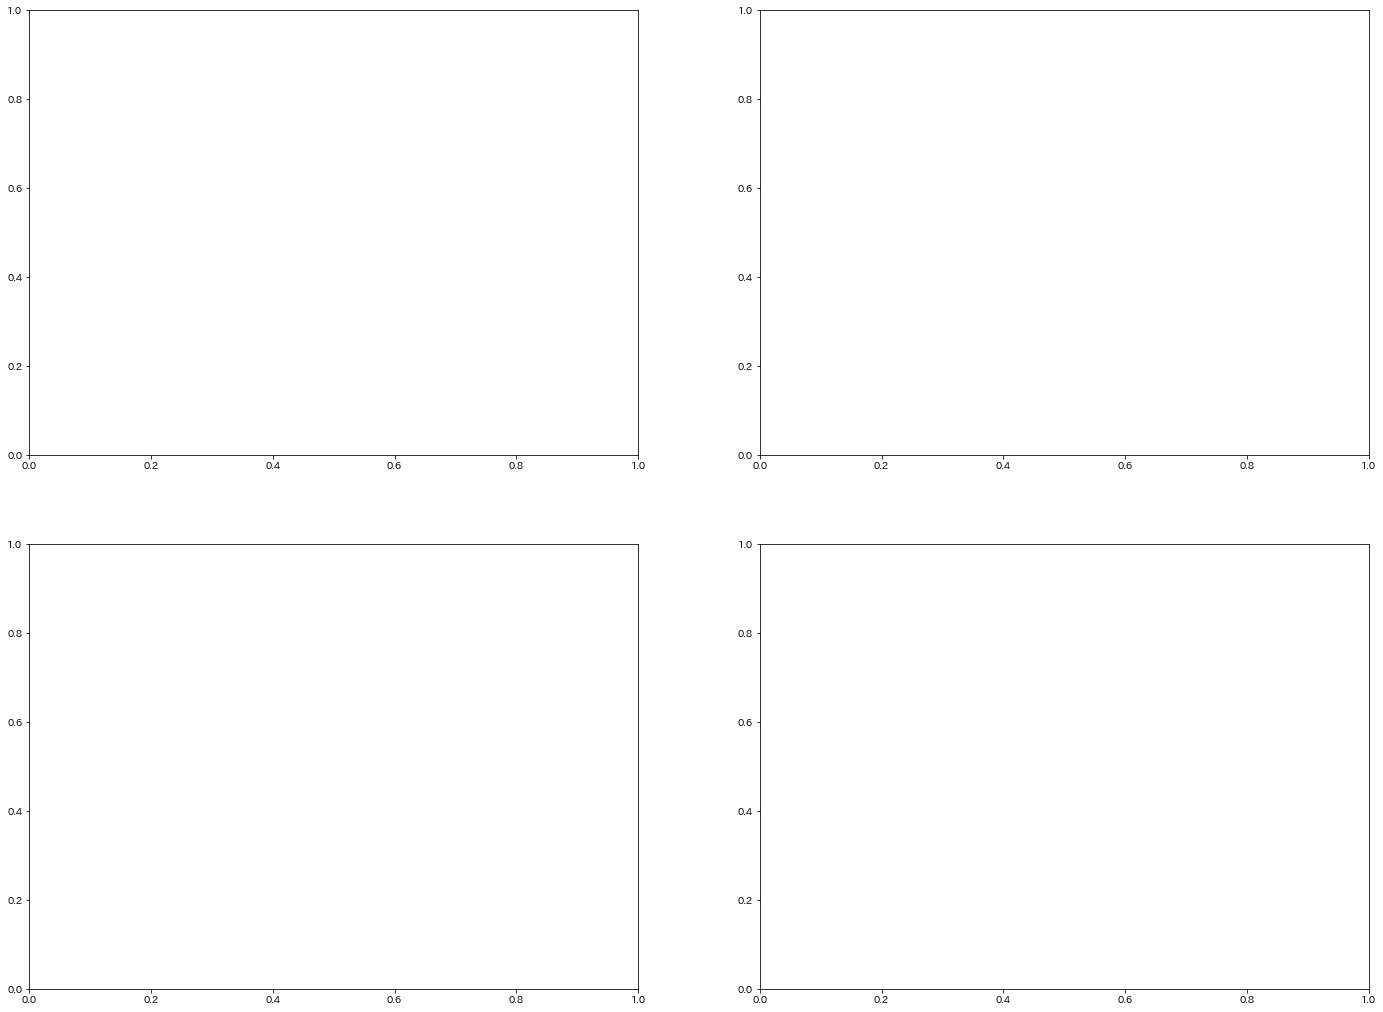

In [64]:
fig, ax = plt.subplots(2,2,figsize=(12*2,9*2))
ax.reshape(1,4)[0]

In [35]:
bar1

<AxesSubplot:title={'center':'b) 新規死亡者数(一週間あたり)'}>

In [ ]:
# 2行目
df["入院者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax2)
ax2.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax2.set_title("c) 入院者数")
df["重症者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax3)
ax3.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax3.set_title("d) 重症者数")
# 3行目
(df["入院者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax4, xticks=df.index, rot=90)
ax4.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax4.set_title("e) 累積陽性者数あたりの述べ入院者数(人×週)")
ax4.set_xlim(df.index[0], df.index[-1])
(df["重症者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax5, xticks=df.index, rot=90)
ax5.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax5.set_title("f) 累積陽性者数あたりの述べ重症者数(人×週)")
ax5.set_xlim(df.index[0], df.index[-1])
# 4行目
(df["重症者数"].loc[:,:"80歳以上"]/df["入院者数"].loc[:,:"80歳以上"]).plot(ax=ax6, xticks=df.index, rot=90)
ax6.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax6.set_title("g) 入院者数に対する重症者数の比率")
ax6.legend(loc="upper left")
ax6.grid(axis='y')
ax6.set_ylim((0,0.04))
ax6.set_xlim(df.index[0], df.index[-1])
# 5行目
(df["死亡者数"].loc[:,:"80歳以上"]/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax7, xticks=df.index, rot=90)
ax7.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax7.set_title("h) 累積陽性者あたりの累積死亡者数")
ax7.legend(loc="upper left")
ax7.grid(axis='y')
ax7.set_yscale('log')
ax7.set_xlim(df.index[0], df.index[-1])

#fig.savefig("fig/CoVid19-Japan-patients_by_age.png", bbox_inches='tight')
#print("Wrote: fig/CoVid19-Japan-patients_by_age.png")
plt.show()